# Instalación e importanción de librerías.

In [ ]:
!pip install contractions
!pip install plotly
!pip install inflect
!pip install scikit-plot
 # librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.3 MB/s 
     |████████████████████████████████| 106 kB 53.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Esta installación es opcional. En Mac no me servia instalarlo de la forma de arriba
import sys
!{sys.executable} -m pip install contractions
!{sys.executable} -m pip install inflect
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Instalación de librerias
import pandas as pd
import numpy as np
np.random.seed(3301)
import sys
from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve,accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
import scikitplot.metrics as skplt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import dropwhile


from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from csv import reader,writer
import operator as op
import string
from sklearn import neighbors

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# Perfilamiento y entendimiento de los datos

In [ ]:
# Uso de la libreria pandas para la lectura de archivos
df=pd.read_csv('drive/MyDrive/clinical_trials_on_cancer_data_clasificacion.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
df_t=df

In [ ]:
df_t.head()

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...


In [ ]:
textos = df_t.copy()
textos['Conteo'] = [len(x) for x in textos['study_and_condition']]
textos['Moda'] = [max(set(x.split(' ')), key = x.split(' ').count) for x in textos['study_and_condition']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['study_and_condition']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['study_and_condition']]
textos.head()

,label,study_and_condition,Conteo,Moda,Max,Min
0,__label__0,study interventions are Saracatinib . recurren...,250,study,15,1
1,__label__1,study interventions are Stem cell transplantat...,224,the,15,1
2,__label__0,study interventions are Lenograstim . recurren...,229,diagnosis,13,1
3,__label__0,study interventions are Doxorubicin . stage ii...,268,stage,13,1
4,__label__1,study interventions are Poly I-C . prostate ca...,232,iraes,15,1


#Preparación y limpieza de los datos

### **Eliminación del Ruido**
La eliminación del ruido se utiliza para dejar el archivo en texto plano, sobre todo cuando vienen de diferentes fuentes como HTML, Twitter, XML, entre otros. También para eliminar caracteres especiales y pasar todo a minúscula.

In [ ]:
def uselessdata(words):
    dot = words.index('.')
    new_words = words[dot+1:]
    return new_words

def nonascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def removestopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = uselessdata(words)
    words = lowercase(words)
    words = numbers(words)
    words = punctuation(words)
    words = nonascii(words)
    words = removestopwords(words)
    return words

### **Normalización**
Para la normalización de los datos se realiza una eliminación de prefijos y sufijos, además de realizar una lemmatización de los verbos.

In [ ]:
def stemw(palabras):
    stemmer = LancasterStemmer()
    stems = []
    for palabra in palabras:
        stem = stemmer.stem(palabra)
        stems.append(stem)
    return stems

def lemmatizew(palabras):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for palabra in palabras:
        lemma = lemmatizer.lemmatize(palabra, pos='v')
        lemmas.append(lemma)
    return lemmas

def stemlemmatize(palabras):
    stems = stemw(palabras)
    lemmas = lemmatizew(palabras)
    return stems + lemmas

In [ ]:
df_t['study_and_condition'] = df_t['study_and_condition'].apply(contractions.fix) #Aplica la corrección de las contracciones 
df_t['study_and_condition'] = df_t['study_and_condition'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
df_t['study_and_condition'] = df_t['study_and_condition'].apply(stemlemmatize) #Aplica la normalización
df_t.head()

,label,study_and_condition
0,__label__0,"[recur, verruc, carcinom, larynx, diagnos, pat..."
1,__label__1,"[hodgkin, lymphom, diagnos, hist, congenit, he..."
2,__label__0,"[recur, adult, diffus, mix, cel, lymphom, diag..."
3,__label__0,"[stag, ii, diffus, larg, cel, lymphom, diagnos..."
4,__label__1,"[prost, cant, diagnos, unresolv, ira, follow, ..."


In [ ]:
df_t['study_and_condition'] = df_t['study_and_condition'] .apply(lambda x: ' '.join(map(str, x)))

In [ ]:
filename = 'processed_data1-2.csv'
df_t.to_csv(filename)

In [ ]:
df_t

,label,study_and_condition
0,__label__0,recur verruc carcinom larynx diagnos paty must...
1,__label__1,hodgkin lymphom diagnos hist congenit hematolo...
2,__label__0,recur adult diffus mix cel lymphom diagnos cre...
3,__label__0,stag ii diffus larg cel lymphom diagnos stag i...
4,__label__1,prost cant diagnos unresolv ira follow pri bio...
...,...,...
11995,__label__0,recur child larg cel lymphom diagnos known hyp...
11996,__label__0,recur rect cant diagnos absolv neutrophil coun...
11997,__label__1,recur lymphoblast lymphom diagnos intrathec in...
11998,__label__0,colorect cant diagnos paty must receiv least o...


# Proyecto parte 2

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

#Analisis profundo de datos
from pandas_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import TransformerMixin
# Importar/ Exportar modelos
from joblib import dump, load

In [ ]:
# Uso de la libreria pandas para la lectura de archivos
df_clinical=pd.read_csv('drive/MyDrive/clinical_trials_on_cancer_data_clasificacion.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data=df_clinical


In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

,label,study_and_condition
10422,__label__1,study interventions are Lenalidomide . margina...
5486,__label__1,study interventions are Rituximab . recurrent ...
7370,__label__0,study interventions are Niacinamide . liver ca...
5427,__label__0,study interventions are Capecitabine . breast ...
6005,__label__1,study interventions are Albumin-Bound Paclitax...


In [ ]:
X_train, y_train = train['study_and_condition'], train['label'] 
display(X_train)
y_train

10422    study interventions are Lenalidomide . margina...
5486     study interventions are Rituximab . recurrent ...
7370     study interventions are Niacinamide . liver ca...
5427     study interventions are Capecitabine . breast ...
6005     study interventions are Albumin-Bound Paclitax...
                               ...                        
10898    study interventions are Irinotecan . colorecta...
578      study interventions are Mitogens . lung cancer...
5848     study interventions are Tacrolimus . nodal mar...
2439     study interventions are Temozolomide . gliosar...
7188     study interventions are Hyaluronic Acid . kidn...
Name: study_and_condition, Length: 9600, dtype: object

10422    __label__1
5486     __label__1
7370     __label__0
5427     __label__0
6005     __label__1
            ...    
10898    __label__0
578      __label__1
5848     __label__1
2439     __label__1
7188     __label__0
Name: label, Length: 9600, dtype: object

### Función para graficar matriz de confusión

In [ ]:
def f_plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### Clase para preprocesamiento de datos en el pipeline

In [ ]:
class TextPreprocessing(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=stopwords.words('english')):
        self.stopwords = stopwords

    def remove_useless_data(self, words):
        dot = words.index('.')
        new_words = words[dot+1:]
        return new_words

    def remove_non_ascii(self, words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words=self.remove_useless_data(words)
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        new_X_train = pd.Series(X)
        new_X_train = new_X_train.apply(contractions.fix)
        new_X_train = new_X_train.apply(word_tokenize)
        new_X_train = new_X_train.apply(lambda x: self.preproccesing(x))
        new_X_train = new_X_train.apply(lambda x: self.stem_and_lemmatize(x))
        new_X_train = new_X_train.apply(lambda x: ' '.join(map(str, x)))
        return new_X_train

## Separar en train y test

In [ ]:
X_train, y_train = train['study_and_condition'], train['label'] 

estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', MultinomialNB())          
    ]

pipe_MB = Pipeline(estimators)

pipe_MB.fit(X_train, y_train)

y_pred_train_MB = pipe_MB.predict(X_train)
y_pred_test_MB = pipe_MB.predict(test['study_and_condition'])
y_pred_test_MB

array(['__label__0', '__label__1', '__label__0', ..., '__label__1',
       '__label__0', '__label__1'], dtype='<U10')

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineMB.joblib'
# Se guarda
dump(pipe_MB, filename) 

['pipelineMB.joblib']

## Regresión logística

###Sin textpreproces

In [ ]:
df_t

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...
...,...,...
11995,__label__0,study interventions are Prednisolone hemisucci...
11996,__label__0,study interventions are Bevacizumab . recurren...
11997,__label__1,"study interventions are Antibodies, Monoclonal..."
11998,__label__0,study interventions are Vorinostat . colorecta...


In [ ]:
X=df_t['study_and_condition']
Y=df_t.label.values
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=33)

In [ ]:
X=df_t['study_and_condition']
Y=df_t.label.values
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=33)

estimators = [
        #('preproccess',TextPreprocessing()),
       ('transform',CountVectorizer(lowercase=False)),
        ('model', BaggingClassifier(LogisticRegression(class_weight='balanced')) )         
    ]

pipe_lr = Pipeline(estimators)

pipe_lr.fit(X_train, y_train )


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('transform', CountVectorizer(lowercase=False)),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced')))])

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineRLss.joblib'
# Se guarda
dump(pipe_lr, filename) 

['pipelineRLss.joblib']

### Con tfidf

In [ ]:
##Con solo tf id


X=df_t['study_and_condition']
Y=df_t.label.values
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=33)

estimators = [
        #('preproccess',TextPreprocessing()),
       ('transform',TfidfVectorizer(lowercase=False, analyzer='word',stop_words= 'english', strip_accents='ascii')),
        ('classifier', LogisticRegression(class_weight='balanced'))          
    ]

pipe_lr = Pipeline(estimators)

pipe_lr.fit(X_train, y_train )



Pipeline(steps=[('transform',
                 TfidfVectorizer(lowercase=False, stop_words='english',
                                 strip_accents='ascii')),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_lr))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_lr))

Exactitud sobre entrenamiento: 0.86
Exactitud sobre test: 0.79


Train Report for Logistic regression tfidf
               precision    recall  f1-score   support

  __label__0       0.86      0.85      0.86      4816
  __label__1       0.85      0.86      0.86      4784

    accuracy                           0.86      9600
   macro avg       0.86      0.86      0.86      9600
weighted avg       0.86      0.86      0.86      9600

Test Report for Logistic regression tfidf
               precision    recall  f1-score   support

  __label__0       0.78      0.79      0.79      1184
  __label__1       0.80      0.79      0.79      1216

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400

Confusion matrix, without normalization


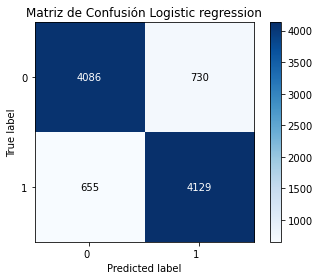

In [ ]:
report_lr = classification_report(y_train, y_pred_train_lr)

print("Train Report for Logistic regression tfidf\n", report_lr)

report_lr = classification_report(y_test, y_pred_test_lr)

print("Test Report for Logistic regression tfidf\n", report_lr)

f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_lr, classes=[0,1],
                      title='Matriz de Confusión Logistic regression')

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineRLtdf.joblib'
# Se guarda
dump(pipe_lr, filename) 

['pipelineRLtdf.joblib']

In [ ]:
#Prueba sin textpreprocesor

X=df_t['study_and_condition']
Y=df_t.label.values
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=33)

estimators = [
        #('preproccess',TextPreprocessing()),
       ('transform',CountVectorizer(lowercase=False)),
        ('model', BaggingClassifier(LogisticRegression(class_weight='balanced')) )         
    ]

pipe_lr = Pipeline(estimators)

pipe_lr.fit(X_train, y_train )
y_pred_train_lr = pipe_lr.predict(X_train)
y_pred_test_lr = pipe_lr.predict(test['study_and_condition'])
y_pred_test_lr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('transform', CountVectorizer(lowercase=False)),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced')))])

In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_lr))
print('Exactitud sobre test: %.2f' % accuracy_score(test['label'], y_pred_test_lr))

Exactitud sobre entrenamiento: 0.86


NameError: ignored

Train Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.90      0.90      0.90      4816
  __label__1       0.90      0.90      0.90      4784

    accuracy                           0.90      9600
   macro avg       0.90      0.90      0.90      9600
weighted avg       0.90      0.90      0.90      9600

Test Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.79      0.81      0.80      1184
  __label__1       0.81      0.79      0.80      1216

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

Confusion matrix, without normalization


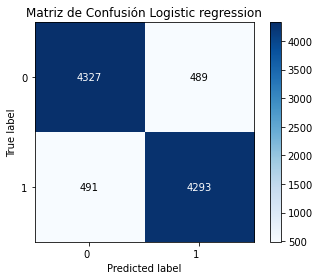

In [ ]:
report_lr = classification_report(y_train, y_pred_train_lr)

print("Train Report for Logistic regression\n", report_lr)

report_lr = classification_report(test['label'], y_pred_test_lr)

print("Test Report for Logistic regression\n", report_lr)

f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_lr, classes=[0,1],
                      title='Matriz de Confusión Logistic regression')

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineRL3.joblib'
# Se guarda
dump(pipeline_lr, filename) 

['pipelineRL3.joblib']

###Con text preprocess

In [ ]:
X_train, y_train = train['study_and_condition'], train['label'] 
estimators = [
        ('preproccess',TextPreprocessing()),
       ('transform',CountVectorizer(lowercase=False)),
        ('model', BaggingClassifier(LogisticRegression(class_weight='balanced')) )         
    ]

pipe_lr = Pipeline(estimators)

pipe_lr.fit(train['study_and_condition'], train['label'] )
y_pred_train_lr = pipe_lr.predict(X_train)
y_pred_test_lr = pipe_lr.predict(test['study_and_condition'])
y_pred_test_lr

ValueError: ignored

In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_lr))
print('Exactitud sobre test: %.2f' % accuracy_score(test['label'], y_pred_test_lr))

Exactitud sobre entrenamiento: 0.87
Exactitud sobre test: 0.79


Train Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.87      0.87      0.87      4816
  __label__1       0.87      0.86      0.87      4784

    accuracy                           0.87      9600
   macro avg       0.87      0.87      0.87      9600
weighted avg       0.87      0.87      0.87      9600

Test Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.79      0.81      0.80      1184
  __label__1       0.81      0.78      0.80      1216

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

Confusion matrix, without normalization


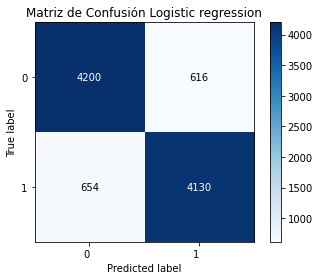

In [ ]:
report_lr = classification_report(y_train, y_pred_train_lr)

print("Train Report for Logistic regression\n", report_lr)

report_lr = classification_report(test['label'], y_pred_test_lr)

print("Test Report for Logistic regression\n", report_lr)

f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_lr, classes=[0,1],
                      title='Matriz de Confusión Logistic regression')

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineRL.joblib'
# Se guarda
dump(pipe_lr, filename) 

['pipelineRL.joblib']

## Regresión logística con hiperparámetros

### Sin text preprocess

In [ ]:
X=df_t['study_and_condition']
Y=df_t.label.values
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=33)
estimators = [
        ('transform',TfidfVectorizer(lowercase=False)),
        ('model', BaggingClassifier(LogisticRegression(class_weight='balanced', penalty='l2', C=10, solver='newton-cg')) )         
    ]

pipe_lr_hs = Pipeline(estimators)

pipe_lr_hs.fit(X_train, y_train)

y_pred_train_lr_hip = pipe_lr_hs.predict(X_train)
y_pred_test_lr_hip = pipe_lr_hs.predict(X_test)
y_pred_test_lr_hip

array(['__label__0', '__label__1', '__label__1', ..., '__label__1',
       '__label__0', '__label__0'], dtype=object)

In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_lr_hips))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_lr_hips))

Exactitud sobre entrenamiento: 0.90
Exactitud sobre test: 0.80


Train Report for Logistic regression with hyperparameters sin pre
               precision    recall  f1-score   support

  __label__0       0.90      0.89      0.90      4816
  __label__1       0.89      0.90      0.90      4784

    accuracy                           0.90      9600
   macro avg       0.90      0.90      0.90      9600
weighted avg       0.90      0.90      0.90      9600

Test Report for Logistic regression with hyperparameters sin pre
               precision    recall  f1-score   support

  __label__0       0.80      0.79      0.80      1184
  __label__1       0.80      0.81      0.80      1216

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

Confusion matrix, without normalization


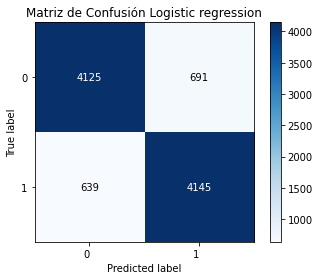

In [ ]:
report_lr = classification_report(y_train, y_pred_train_lr_hip)

print("Train Report for Logistic regression with hyperparameters sin pre\n", report_lr)

report_lr = classification_report(y_test, y_pred_test_lr_hip)

print("Test Report for Logistic regression with hyperparameters sin pre\n", report_lr)

f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_lr, classes=[0,1],
                      title='Matriz de Confusión Logistic regression')

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineRLHs.joblib'
# Se guarda
dump(pipe_lr_h, filename) 

['pipelineRLHs.joblib']

### Con text preprocess

In [ ]:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [ ]:
%%time
X_train, y_train = train['study_and_condition'], train['label'] 
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('model', BaggingClassifier(LogisticRegression(class_weight='balanced')) )         
    ]

pipe_lr = Pipeline(estimators)

param_grid = {'transform':[CountVectorizer(binary=True,lowercase=False),CountVectorizer(lowercase=False),TfidfVectorizer(lowercase=False)],
              'model__base_estimator__penalty' : ['l1','l2'],
              'model__base_estimator__C':  np.logspace(-3,3,7),
              'model__base_estimator__solver':['newton-cg', 'lbfgs', 'liblinear'],
            }

grid_search_lr = GridSearchCV(pipe_lr, param_grid=param_grid,scoring='recall_macro', n_jobs=-1, cv=10, error_score=0.0)

grid_search_lr.fit(X_train, y_train) #Se demora como 3h 5min

y_pred_train_lr_h = grid_search_lr.predict(X_train)
y_pred_test_lr_h = grid_search_lr.predict(test['study_and_condition'])
y_pred_test_lr_h

In [ ]:
print("Mejor parámetro: {}".format(grid_search_lr.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(grid_search_lr.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to 0.0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight

Mejor parámetro: {'model__base_estimator__C': 1.0, 'model__base_estimator__penalty': 'l2', 'model__base_estimator__solver': 'liblinear', 'transform': TfidfVectorizer(lowercase=False)}
Mejor cross-validation score: 0.79
CPU times: user 1min 37s, sys: 10.4 s, total: 1min 47s
Wall time: 2h 47min 53s


In [ ]:
print("Mejor parámetro: {}".format(grid_search_lr.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(grid_search_lr.best_score_))

Mejor parámetro: {'model__base_estimator__C': 1.0, 'model__base_estimator__penalty': 'l2', 'model__base_estimator__solver': 'liblinear', 'transform': TfidfVectorizer(lowercase=False)}
Mejor cross-validation score: 0.79


In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_lr_h))
print('Exactitud sobre test: %.2f' % accuracy_score(test['label'], y_pred_test_lr_h))

Exactitud sobre entrenamiento: 0.84
Exactitud sobre test: 0.80


Train Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.87      0.87      0.87      4816
  __label__1       0.87      0.86      0.87      4784

    accuracy                           0.87      9600
   macro avg       0.87      0.87      0.87      9600
weighted avg       0.87      0.87      0.87      9600

Test Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.79      0.81      0.80      1184
  __label__1       0.81      0.78      0.80      1216

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

Confusion matrix, without normalization


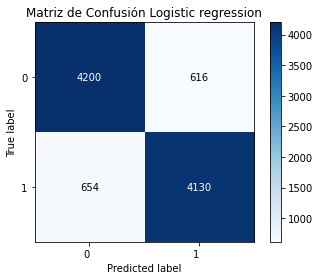

In [ ]:
report_lr_h = classification_report(y_train, y_pred_train_lr)

print("Train Report for Logistic regression\n", report_lr_h)

report_lr_h = classification_report(test['label'], y_pred_test_lr)

print("Test Report for Logistic regression\n", report_lr_h)

f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_lr, classes=[0,1],
                      title='Matriz de Confusión Logistic regression')

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineRL_H.joblib'
# Se guarda
dump(grid_search_lr, filename) 

## Regresión con los valores obtenidos 
Para que no se demore 3 horas corriendo

In [ ]:
X_train, y_train = train['study_and_condition'], train['label'] 
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',TfidfVectorizer(lowercase=False)),
        ('model', BaggingClassifier(LogisticRegression(class_weight='balanced', penalty='l2', C=10, solver='newton-cg')) )         
    ]

pipe_lr_h = Pipeline(estimators)

pipe_lr_h.fit(X_train, y_train)

y_pred_train_lr_hip = pipe_lr_h.predict(X_train)
y_pred_test_lr_hip = pipe_lr_h.predict(test['study_and_condition'])
y_pred_test_lr_hip

array(['__label__0', '__label__1', '__label__1', ..., '__label__1',
       '__label__0', '__label__1'], dtype=object)

In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_lr_hip))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_lr_hip))

Exactitud sobre entrenamiento: 0.88
Exactitud sobre test: 0.80


Train Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.86      0.87      0.87      4816
  __label__1       0.87      0.86      0.87      4784

    accuracy                           0.87      9600
   macro avg       0.87      0.87      0.87      9600
weighted avg       0.87      0.87      0.87      9600

Test Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.78      0.81      0.79      1184
  __label__1       0.81      0.78      0.79      1216

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400

Confusion matrix, without normalization


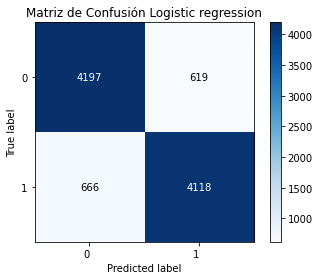

In [ ]:
report_lr = classification_report(y_train, y_pred_train_lr_hip)

print("Train Report for Logistic regression\n", report_lr)

report_lr = classification_report(test['label'], y_pred_test_lr_hip)

print("Test Report for Logistic regression\n", report_lr)

f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_lr, classes=[0,1],
                      title='Matriz de Confusión Logistic regression')

## KNN

### Sin text preprocess

In [ ]:
%%time

X=df_t['study_and_condition']
Y=df_t.label.values
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=33)
estimators = [
       # ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', KNeighborsClassifier())          
    ]

pipe_knn = Pipeline(estimators)

param_grid = {'transform':[CountVectorizer(binary=True,lowercase=False),CountVectorizer(lowercase=False),TfidfVectorizer(lowercase=False)],
              'classifier__n_neighbors':[2,3,4,5,6,7],
              'classifier__p': [1, 2], #1 Manhattan, 2 euclidiana
            }


grid_search_knn = GridSearchCV(pipe_knn, param_grid=param_grid,scoring='recall_macro', cv=3, error_score=0.0)


grid_search_knn.fit(X_train,y_train)


y_pred_train_knn = grid_search_knn.predict(X_train)
y_pred_test_knn = grid_search_knn.predict(X_test)
y_pred_test_knn

CPU times: user 6min 38s, sys: 1.72 s, total: 6min 40s
Wall time: 4min 16s


In [ ]:
print("Mejor parámetro: {}".format(grid_search_knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Mejor parámetro: {'classifier__n_neighbors': 7, 'classifier__p': 2, 'transform': TfidfVectorizer(lowercase=False)}
Mejor cross-validation score: 0.74


In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_knn))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_knn))

Exactitud sobre entrenamiento: 0.82
Exactitud sobre test: 0.76


Confusion matrix, without normalization
Train Report for KNN sin pre
               precision    recall  f1-score   support

  __label__0       0.81      0.84      0.82      4816
  __label__1       0.83      0.80      0.81      4784

    accuracy                           0.82      9600
   macro avg       0.82      0.82      0.82      9600
weighted avg       0.82      0.82      0.82      9600

Test Report for KNN sint pre
               precision    recall  f1-score   support

  __label__0       0.74      0.79      0.77      1184
  __label__1       0.78      0.73      0.75      1216

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.76      0.76      0.76      2400



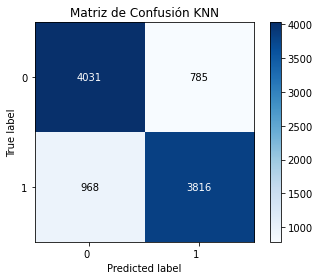

In [ ]:
f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_knn, classes=[0,1],
                      title='Matriz de Confusión KNN')

report_knn = classification_report(y_train, y_pred_train_knn)

print("Train Report for KNN sin pre\n", report_knn)

report_knn = classification_report(y_test, y_pred_test_knn)

print("Test Report for KNN sint pre\n", report_knn)

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineKNNs.joblib'
# Se guarda
dump(grid_search_knn, filename) 

['pipelineKNNs.joblib']

### Con textpreprocess

In [ ]:
%%time
X_train, y_train = train['study_and_condition'], train['label'] 
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', KNeighborsClassifier())          
    ]

pipe_knn = Pipeline(estimators)

param_grid = {'transform':[CountVectorizer(binary=True,lowercase=False),CountVectorizer(lowercase=False),TfidfVectorizer(lowercase=False)],
              'classifier__n_neighbors':[2,3,4,5,6,7],
              'classifier__p': [1, 2], #1 Manhattan, 2 euclidiana
            }


grid_search_knn = GridSearchCV(pipe_knn, param_grid=param_grid,scoring='recall_macro', cv=3, error_score=0.0)


grid_search_knn.fit(X_train,y_train)


y_pred_train_knn = grid_search_knn.predict(X_train)
y_pred_test_knn = grid_search_knn.predict(test['study_and_condition'])
y_pred_test_knn

CPU times: user 19min 1s, sys: 8.17 s, total: 19min 9s
Wall time: 17min 40s


In [ ]:
print("Mejor parámetro: {}".format(grid_search_knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Mejor parámetro: {'classifier__n_neighbors': 7, 'classifier__p': 2, 'transform': TfidfVectorizer(lowercase=False)}
Mejor cross-validation score: 0.75


Se obtuvo que el mejor número de vecinos es 7, la mejor función es la #2= Euclidiana, y la mejor transformación es la de TfidfVectorizer.  

In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_knn))
print('Exactitud sobre test: %.2f' % accuracy_score(test['label'], y_pred_test_knn))

Exactitud sobre entrenamiento: 0.82
Exactitud sobre test: 0.76


Confusion matrix, without normalization
Train Report for KNN
               precision    recall  f1-score   support

  __label__0       0.81      0.84      0.83      4816
  __label__1       0.83      0.81      0.82      4784

    accuracy                           0.82      9600
   macro avg       0.82      0.82      0.82      9600
weighted avg       0.82      0.82      0.82      9600

Test Report for KNN
               precision    recall  f1-score   support

  __label__0       0.74      0.79      0.76      1184
  __label__1       0.78      0.73      0.76      1216

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.76      0.76      0.76      2400



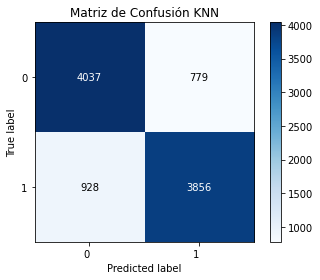

In [ ]:
f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_knn, classes=[0,1],
                      title='Matriz de Confusión KNN')

report_knn = classification_report(y_train, y_pred_train_knn)

print("Train Report for KNN\n", report_knn)

report_knn = classification_report(test['label'], y_pred_test_knn)

print("Test Report for KNN\n", report_knn)

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineKNN.joblib'
# Se guarda
dump(grid_search_knn, filename) 

['pipelineKNN.joblib']

## Naive Bayes

### Sin textprocess

In [ ]:
%%time
X=df_t['study_and_condition']
Y=df_t.label.values
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=33)
estimators = [
      #  ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', MultinomialNB())          
    ]

pipe_nb = Pipeline(estimators)

pipe_nb.fit(X_train, y_train)



CPU times: user 242 ms, sys: 2.93 ms, total: 245 ms
Wall time: 255 ms


In [ ]:
y_pred_train_nb = pipe_nb.predict(X_train)
y_pred_test_nb = pipe_nb.predict(X_test)
y_pred_test_nb
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_nb))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_nb))

Exactitud sobre entrenamiento: 0.82
Exactitud sobre test: 0.78


Train Report for Naive Bayes
               precision    recall  f1-score   support

  __label__0       0.81      0.83      0.82      4816
  __label__1       0.83      0.81      0.82      4784

    accuracy                           0.82      9600
   macro avg       0.82      0.82      0.82      9600
weighted avg       0.82      0.82      0.82      9600

Test Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.77      0.79      0.78      1184
  __label__1       0.79      0.78      0.78      1216

    accuracy                           0.78      2400
   macro avg       0.78      0.78      0.78      2400
weighted avg       0.78      0.78      0.78      2400

Confusion matrix, without normalization


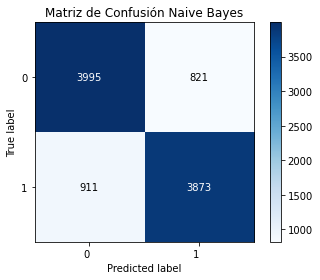

In [ ]:
report_nb = classification_report(y_train, y_pred_train_nb)

print("Train Report for Naive Bayes\n", report_nb)

report_nb = classification_report(y_test, y_pred_test_nb)

print("Test Report for Logistic regression\n", report_nb)

f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_nb, classes=[0,1],
                      title='Matriz de Confusión Naive Bayes')

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineNBs.joblib'
# Se guarda
dump(pipe_nb, filename) 

['pipelineNBs.joblib']

### Con text process

In [ ]:
%%time
X_train, y_train = train['study_and_condition'], train['label'] 
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', MultinomialNB())          
    ]

pipe_nb = Pipeline(estimators)

pipe_nb.fit(X_train, y_train)

y_pred_train_nb = pipe_nb.predict(X_train)
y_pred_test_nb = pipe_nb.predict(test['study_and_condition'])
y_pred_test_nb

CPU times: user 939 ms, sys: 68.2 ms, total: 1.01 s
Wall time: 1.11 s


In [ ]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_nb))
print('Exactitud sobre test: %.2f' % accuracy_score(test['label'], y_pred_test_nb))

Exactitud sobre entrenamiento: 0.81
Exactitud sobre test: 0.77


Train Report for Naive Bayes
               precision    recall  f1-score   support

  __label__0       0.80      0.82      0.81      4816
  __label__1       0.81      0.80      0.81      4784

    accuracy                           0.81      9600
   macro avg       0.81      0.81      0.81      9600
weighted avg       0.81      0.81      0.81      9600

Test Report for Logistic regression
               precision    recall  f1-score   support

  __label__0       0.76      0.79      0.77      1184
  __label__1       0.79      0.76      0.77      1216

    accuracy                           0.77      2400
   macro avg       0.77      0.77      0.77      2400
weighted avg       0.77      0.77      0.77      2400

Confusion matrix, without normalization


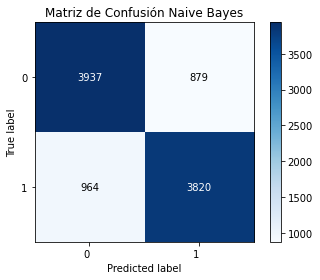

In [ ]:
report_nb = classification_report(y_train, y_pred_train_nb)

print("Train Report for Naive Bayes\n", report_nb)

report_nb = classification_report(test['label'], y_pred_test_nb)

print("Test Report for Logistic regression\n", report_nb)

f_plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_nb, classes=[0,1],
                      title='Matriz de Confusión Naive Bayes')

In [ ]:
# Usamos la lbreria joblib
filename = 'pipelineNB.joblib'
# Se guarda
dump(pipe_nb, filename) 

['pipelineNB.joblib']

# Comparación exactitud modelos

In [ ]:
print("Naive Bayes")
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_nb))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_nb))
print(" ")

print("Regresión logística")
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_lr))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_lr))
print(" ")

print("Regresión logística con hiperparámetros")
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_lr_hip))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_lr_hip))
print(" ")

print("KNN")
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train_knn))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test_knn))

Naive Bayes
Exactitud sobre entrenamiento: 0.82
Exactitud sobre test: 0.78
 
Regresión logística
Exactitud sobre entrenamiento: 0.86
Exactitud sobre test: 0.79
 
Regresión logística con hiperparámetros
Exactitud sobre entrenamiento: 0.90
Exactitud sobre test: 0.80
 
KNN
Exactitud sobre entrenamiento: 0.82
Exactitud sobre test: 0.76


### Prueba

In [ ]:
datos_l=pd.read_csv('drive/MyDrive/clinical_trials_on_cancer_data_clasificacion.csv', sep=',', encoding = 'utf-8')

datos_l = datos_l.drop(['label'],axis=1)
datos_l

,study_and_condition
0,study interventions are Saracatinib . recurren...
1,study interventions are Stem cell transplantat...
2,study interventions are Lenograstim . recurren...
3,study interventions are Doxorubicin . stage ii...
4,study interventions are Poly I-C . prostate ca...
...,...
11995,study interventions are Prednisolone hemisucci...
11996,study interventions are Bevacizumab . recurren...
11997,"study interventions are Antibodies, Monoclonal..."
11998,study interventions are Vorinostat . colorecta...


In [ ]:
filename = 'prueba.csv'
datos_l.to_csv(filename)

In [ ]:
nombrearchivo= 'pipelineRLtdf.joblib'

In [ ]:
# Se lee
pipe = load(nombrearchivo)
pipe


Pipeline(steps=[('transform',
                 TfidfVectorizer(lowercase=False, stop_words='english',
                                 strip_accents='ascii')),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced')))])

In [ ]:
df_recent=df_t.drop(['label'],axis=1)

In [ ]:
x_f=df_recent['study_and_condition']
x_f

0        study interventions are Saracatinib . recurren...
1        study interventions are Stem cell transplantat...
2        study interventions are Lenograstim . recurren...
3        study interventions are Doxorubicin . stage ii...
4        study interventions are Poly I-C . prostate ca...
                               ...                        
11995    study interventions are Prednisolone hemisucci...
11996    study interventions are Bevacizumab . recurren...
11997    study interventions are Antibodies, Monoclonal...
11998    study interventions are Vorinostat . colorecta...
11999    study interventions are Freund's Adjuvant . ov...
Name: study_and_condition, Length: 12000, dtype: object

In [ ]:
# Clasificamos los datos recientes
df_recent['label'] = pipe.predict(x_f)

In [ ]:
df_recent

,study_and_condition,label
0,study interventions are Saracatinib . recurren...,__label__0
1,study interventions are Stem cell transplantat...,__label__1
2,study interventions are Lenograstim . recurren...,__label__0
3,study interventions are Doxorubicin . stage ii...,__label__0
4,study interventions are Poly I-C . prostate ca...,__label__1
...,...,...
11995,study interventions are Prednisolone hemisucci...,__label__1
11996,study interventions are Bevacizumab . recurren...,__label__0
11997,"study interventions are Antibodies, Monoclonal...",__label__1
11998,study interventions are Vorinostat . colorecta...,__label__0


# Exportar modelos

In [ ]:
filename_lr='pipe_rl_hip.joblib'
dump(grid_search_lr, filename_lr)

['pipe_rl_hip.joblib']

In [ ]:
#Exportamos el estimador con modelo Naive Bayes
# Usamos la lbreria joblib
filename = 'pipe_nb_2.joblib'
# Se guarda
dump(pipe_nb, filename)

['pipe_nb_2.joblib']

In [ ]:
#Exportamos el estimador con modelo KNN
# Usamos la lbreria joblib
filename = 'pipe_knn.joblib'
# Se guarda
dump(grid_search_knn, filename)

['pipe_knn.joblib']

In [ ]:
#Exportamos el estimador con modelo Regresión logística
# Usamos la lbreria joblib
filename = 'pipe_lr_2.joblib'
# Se guarda
dump(pipe_lr, filename)

['pipe_lr_2.joblib']

In [ ]:
#Exportamos el estimador con modelo Regresión logística con hiperparámetros
# Usamos la lbreria joblib
filename = 'pipe_lr_hiperparametros2.joblib'
# Se guarda
dump(grid_search_lr, filename)

['pipe_lr_hiperparametros2.joblib']